In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from joblib import Parallel, delayed, parallel_backend
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import os
import seaborn as sns
%matplotlib inline

In [ ]:
pancreatic = pd.read_csv('/content/binarized_pancreatic_cancer_dataset.csv')
pancreatic.head()

,Age,Smoking_History,Obesity,Diabetes,Chronic_Pancreatitis,Family_History,Hereditary_Condition,Jaundice,Abdominal_Discomfort,Back_Pain,...,Diet_Processed_Food_High,Diet_Processed_Food_Low,Diet_Processed_Food_Medium,Access_to_Healthcare_High,Access_to_Healthcare_Low,Access_to_Healthcare_Medium,Urban_vs_Rural_Urban,Economic_Status_High,Economic_Status_Low,Economic_Status_Middle
0,64,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,77,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
2,71,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,56,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,82,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
pancreatic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             50000 non-null  int64
 1   Smoking_History                 50000 non-null  int64
 2   Obesity                         50000 non-null  int64
 3   Diabetes                        50000 non-null  int64
 4   Chronic_Pancreatitis            50000 non-null  int64
 5   Family_History                  50000 non-null  int64
 6   Hereditary_Condition            50000 non-null  int64
 7   Jaundice                        50000 non-null  int64
 8   Abdominal_Discomfort            50000 non-null  int64
 9   Back_Pain                       50000 non-null  int64
 10  Weight_Loss                     50000 non-null  int64
 11  Development_of_Type2_Diabetes   50000 non-null  int64
 12  Survival_Time_Months            50000 non-null  int64
 13  S

In [ ]:
cols_to_drop = ['Diabetes', 'Chronic_Pancreatitis','Family_History','Hereditary_Condition','Jaundice','Development_of_Type2_Diabetes','Survival_Status','Country_Australia','Country_Brazil','Country_Canada','Country_China','Country_Germany','Country_India','Country_South Africa','Country_United Kingdom', 'Country_United States', 'Gender_Male', 'Treatment_Type_Chemotherapy','Treatment_Type_Radiation', 'Treatment_Type_Surgery', 'Physical_Activity_Level_High', 'Physical_Activity_Level_Low', 'Physical_Activity_Level_Medium','Diet_Processed_Food_High','Diet_Processed_Food_Low', 'Diet_Processed_Food_Medium', 'Access_to_Healthcare_High', 'Access_to_Healthcare_Low','Access_to_Healthcare_Medium','Economic_Status_High','Economic_Status_Low','Economic_Status_Middle']
pancreatic.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
pancreatic_numerical_features = pancreatic[['Age','Survival_Time_Months']]
pancreatic_numerical_features

,Age,Survival_Time_Months
0,64,13
1,77,13
2,71,3
3,56,6
4,82,9
...,...,...
49995,55,9
49996,79,19
49997,76,7
49998,62,21


In [ ]:
pancreatic_categorical_features = pancreatic.drop(['Age','Survival_Time_Months'], axis=1)
pancreatic_categorical_features

,Smoking_History,Obesity,Abdominal_Discomfort,Back_Pain,Weight_Loss,Alcohol_Consumption,Stage_at_Diagnosis_Stage I,Stage_at_Diagnosis_Stage II,Stage_at_Diagnosis_Stage III,Stage_at_Diagnosis_Stage IV,Urban_vs_Rural_Urban
0,0,0,0,0,0,0,0,0,1,0,1
1,1,1,0,0,0,1,0,0,1,0,1
2,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0,1,0,0,1,0,0,0,0,1,1
49996,0,0,1,0,0,0,0,0,1,0,0
49997,0,0,0,0,0,0,0,0,0,1,1
49998,0,0,0,1,0,1,0,1,0,0,1


In [ ]:
pancreatic_categorical_features.drop(['Stage_at_Diagnosis_Stage I','Stage_at_Diagnosis_Stage II','Stage_at_Diagnosis_Stage III','Stage_at_Diagnosis_Stage IV'], axis=1, inplace=True)
pancreatic_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Smoking_History       50000 non-null  int64
 1   Obesity               50000 non-null  int64
 2   Abdominal_Discomfort  50000 non-null  int64
 3   Back_Pain             50000 non-null  int64
 4   Weight_Loss           50000 non-null  int64
 5   Alcohol_Consumption   50000 non-null  int64
 6   Urban_vs_Rural_Urban  50000 non-null  int64
dtypes: int64(7)
memory usage: 2.7 MB


In [ ]:
target = pancreatic[['Stage_at_Diagnosis_Stage I','Stage_at_Diagnosis_Stage II','Stage_at_Diagnosis_Stage III','Stage_at_Diagnosis_Stage IV']].copy()
target.head()

,Stage_at_Diagnosis_Stage I,Stage_at_Diagnosis_Stage II,Stage_at_Diagnosis_Stage III,Stage_at_Diagnosis_Stage IV
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [ ]:
def convert_category(series):
  """
  Converts a pandas Series to the 'category' dtype.

  Args:
    series: The pandas Series to convert.

  Returns:
    The converted pandas Series with 'category' dtype.
  """
  return series.astype('category')

In [ ]:
###Convert all categorical variables to category
# Create an empty list to store the Series
series_list = []
for col in pancreatic_categorical_features.columns:
    result= convert_category(pancreatic_categorical_features[col])
    series_list.append(result)
# Concatenate the Series into a DataFrame
result_pancreatic = pd.concat(series_list, axis=1)
pancreatic_categorical_features = result_pancreatic
pancreatic_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Smoking_History       50000 non-null  category
 1   Obesity               50000 non-null  category
 2   Abdominal_Discomfort  50000 non-null  category
 3   Back_Pain             50000 non-null  category
 4   Weight_Loss           50000 non-null  category
 5   Alcohol_Consumption   50000 non-null  category
 6   Urban_vs_Rural_Urban  50000 non-null  category
dtypes: category(7)
memory usage: 342.8 KB


In [ ]:
pancreatic_categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Smoking_History       50000 non-null  category
 1   Obesity               50000 non-null  category
 2   Abdominal_Discomfort  50000 non-null  category
 3   Back_Pain             50000 non-null  category
 4   Weight_Loss           50000 non-null  category
 5   Alcohol_Consumption   50000 non-null  category
 6   Urban_vs_Rural_Urban  50000 non-null  category
dtypes: category(7)
memory usage: 342.8 KB


In [ ]:
data = pd.concat([pancreatic_numerical_features, pancreatic_categorical_features,target], axis=1)
data.drop(['Stage_at_Diagnosis_Stage I','Stage_at_Diagnosis_Stage II','Stage_at_Diagnosis_Stage III','Stage_at_Diagnosis_Stage IV'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   50000 non-null  int64   
 1   Survival_Time_Months  50000 non-null  int64   
 2   Smoking_History       50000 non-null  category
 3   Obesity               50000 non-null  category
 4   Abdominal_Discomfort  50000 non-null  category
 5   Back_Pain             50000 non-null  category
 6   Weight_Loss           50000 non-null  category
 7   Alcohol_Consumption   50000 non-null  category
 8   Urban_vs_Rural_Urban  50000 non-null  category
dtypes: category(7), int64(2)
memory usage: 1.1 MB


In [ ]:
X = data
y = target

In [ ]:
## Train-Test Split
###Split 80-20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
num_col_names = pancreatic_numerical_features.columns
# 1. Import the class you will use
from sklearn.preprocessing import StandardScaler

# 2. Create an instance of the class
scaler = StandardScaler()

# 3. Use the fit method of the instance
scaler.fit(X_train[num_col_names])

# 4. Use the transform method to perform the transformation and explicitly cast to float64
X_train.loc[:, num_col_names] = scaler.transform(X_train[num_col_names]).astype('float64')

## Remember to also standardize the numerical features in the testing set
X_test.loc[:, num_col_names] = scaler.transform(X_test[num_col_names]).astype('float64')

/tmp/ipython-input-3345502470.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.14712009 -0.65599627 -1.05668879 ...  0.44590817 -1.85807384
 -0.25530375]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_col_names] = scaler.transform(X_train[num_col_names]).astype('float64')
/tmp/ipython-input-3345502470.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.70036645 -0.43324727 -0.522287   ...  0.10099108 -0.522287
 -0.61132672]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:, num_col_names] = scaler.transform(X_train[num_col_names]).astype('float64')
/tmp/ipython-input-3345502470.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.05668879 -0.7

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

# Convert y_train and y_test from multilabel to multiclass
y_train_multiclass = y_train.idxmax(axis=1)
y_test_multiclass = y_test.idxmax(axis=1)


# Initialize model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'roc_auc']

# GridSearchCV with multiple scoring metrics, set 'refit' to the primary metric (e.g., 'roc_auc')
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='roc_auc',  # Choose the metric you care most about
    n_jobs=-1
)

# Fit the model (ensure X and y are defined)
grid_search.fit(X_train, y_train_multiclass)

# Optional: view best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score:", grid_search.best_score_)
grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'C': 0.001, 'penalty': 'l1'}
Best ROC AUC Score: nan


LogisticRegression(C=0.001, max_iter=1000, penalty='l1', solver='liblinear')

Best cross-validation score: nan
Test Accuracy: 0.6334
                              precision    recall  f1-score   support

  Stage_at_Diagnosis_Stage I       0.67      0.60      0.63       987
 Stage_at_Diagnosis_Stage II       0.80      0.17      0.28      2052
Stage_at_Diagnosis_Stage III       0.55      0.47      0.51      2971
 Stage_at_Diagnosis_Stage IV       0.65      1.00      0.79      3990

                    accuracy                           0.63     10000
                   macro avg       0.67      0.56      0.55     10000
                weighted avg       0.65      0.63      0.59     10000



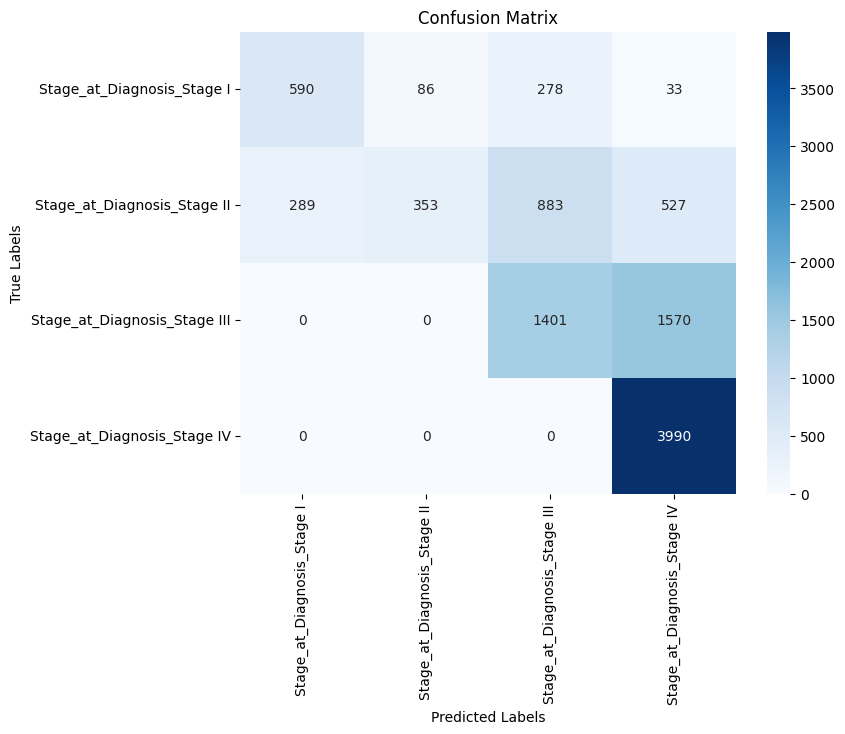

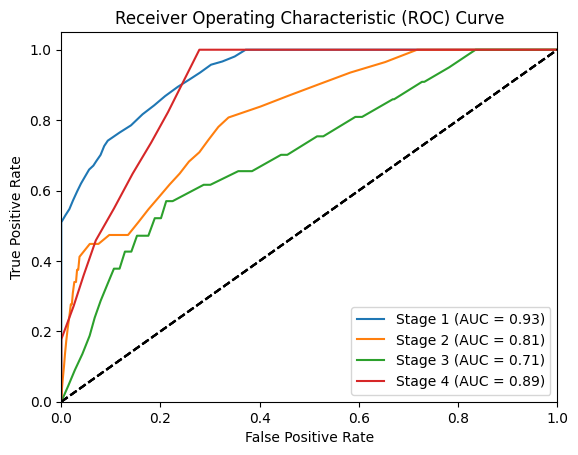

In [ ]:
best_score = grid_search.best_score_
print(f"Best cross-validation score: {best_score:.4f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_test_multiclass = y_test.idxmax(axis=1) # Convert y_test to multiclass
test_accuracy = accuracy_score(y_test_multiclass, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(classification_report(y_test_multiclass, y_pred))

# Confusion Matrix Chart
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_multiclass), yticklabels=np.unique(y_test_multiclass))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# combine ROC multiclass curve for each stage
fpr = {}
tpr = {}
roc_auc = {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test.iloc[:, i], best_model.predict_proba(X_test)[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Stage {i+1} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
plt.show()




In [ ]:
# training a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'roc_auc']

# Convert y_train and y_test from multilabel to multiclass
y_train_multiclass = y_train.idxmax(axis=1)
y_test_multiclass = y_test.idxmax(axis=1)


# GridSearchCV with multiple scoring metrics, set 'refit' to the primary metric (e.g., 'roc_auc')
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='roc_auc',  # Choose the metric you care most about
    n_jobs=-1
)

# Fit the model (ensure X and y are defined)
grid_search_rf.fit(X_train, y_train_multiclass)

# Optional: view best parameters and score
print("Best Parameters:", grid_search_rf.best_params_)
print("Best ROC AUC Score:", grid_search_rf.best_score_)
best_score = grid_search_rf.best_score_
print(f"Best cross-validation score: {best_score:.4f}")
best_model = grid_search_rf.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test_multiclass, y_pred)
test_accuracy
print(classification_report(y_test_multiclass, y_pred))

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC AUC Score: nan
Best cross-validation score: nan
                              precision    recall  f1-score   support

  Stage_at_Diagnosis_Stage I       0.68      0.54      0.60       987
 Stage_at_Diagnosis_Stage II       0.51      0.46      0.48      2052
Stage_at_Diagnosis_Stage III       0.51      0.48      0.50      2971
 Stage_at_Diagnosis_Stage IV       0.72      0.82      0.76      3990

                    accuracy                           0.62     10000
                   macro avg       0.60      0.58      0.59     10000
                weighted avg       0.61      0.62      0.61     10000



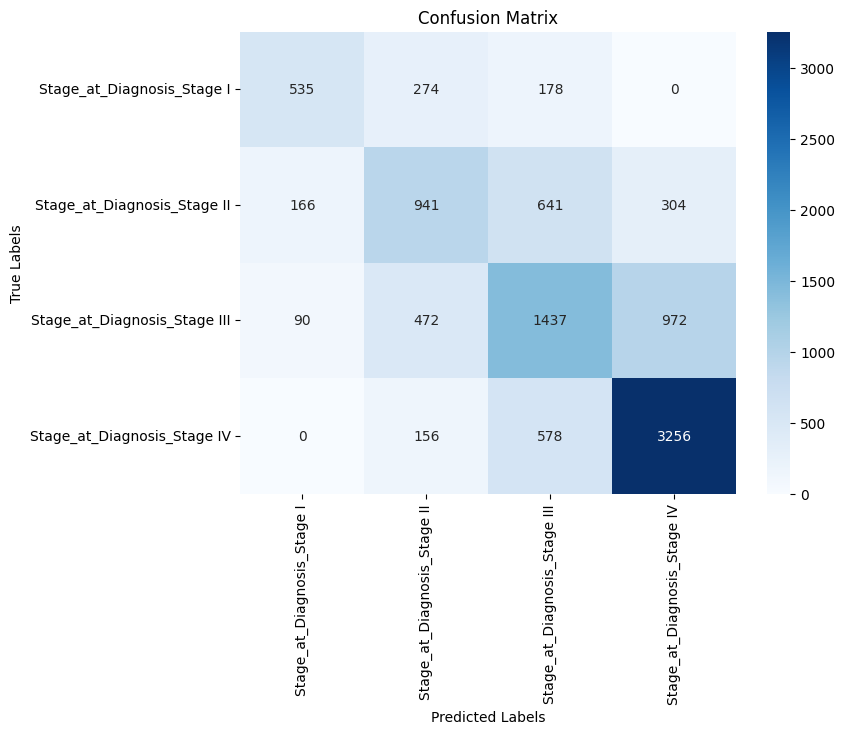

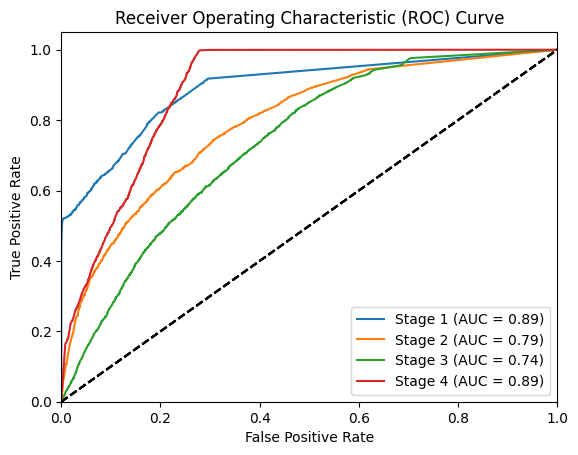

In [ ]:
# Confusion Matrix Chart
cm = confusion_matrix(y_test_multiclass, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_multiclass), yticklabels=np.unique(y_test_multiclass))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# combine ROC multiclass curve for each stage
fpr = {}
tpr = {}
roc_auc = {}
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test.iloc[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test.iloc[:, i], best_model.predict_proba(X_test)[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Stage {i+1} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
plt.show()